In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

import sys
sys.path.append("..")

plt.style.use("~/.config/matplotlib/notebook")

In [20]:
training_data = Dataset("../data/training_data_ss_11_20.nc")
x = training_data.variables["input"][:]
y = training_data.variables["cloud_class"][:]

In [22]:
y.shape

(124718,)

In [3]:
training_data.variables

OrderedDict([('input', <class 'netCDF4._netCDF4.Variable'>
              float32 input(samples, bands, along_track, across_track)
              unlimited dimensions: samples
              current shape = (124718, 2, 41, 41)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('cth', <class 'netCDF4._netCDF4.Variable'>
              float32 cth(samples)
              unlimited dimensions: samples
              current shape = (124718,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('ctp', <class 'netCDF4._netCDF4.Variable'>
              float32 ctp(samples)
              unlimited dimensions: samples
              current shape = (124718,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('cloud_class', <class 'netCDF4._netCDF4.Variable'>
              int32 cloud_class(samples)
              unlimited dimensions: samples
              current shape = (124718,)
   

In [23]:
inds = np.where(np.all(np.logical_not(np.isnan(x)), axis = (1, 2, 3)))[0]
x = x[inds, :, :, :]
y = y[inds]

## Class distribution

(array([54625.,     0.,     0., 19041.,     0.,     0., 15279.,     0.,
            0., 35650.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

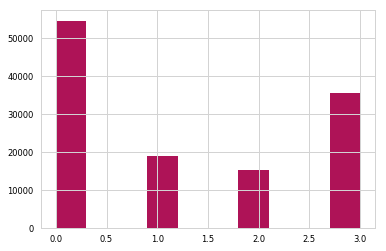

In [24]:
plt.hist(y)

## Plot some cloudy images

In [30]:
def plot_classes(x, y, c, band = 0):
    plt.figure()
    f, axs = plt.subplots(1, 4, figsize = (20, 5))
    
    inds = np.where(y == c)[0]
    for i in range(4):
        ind = np.random.randint(inds.size)
        axs[i].pcolor(x[ind, band, :, :])

<Figure size 432x288 with 0 Axes>

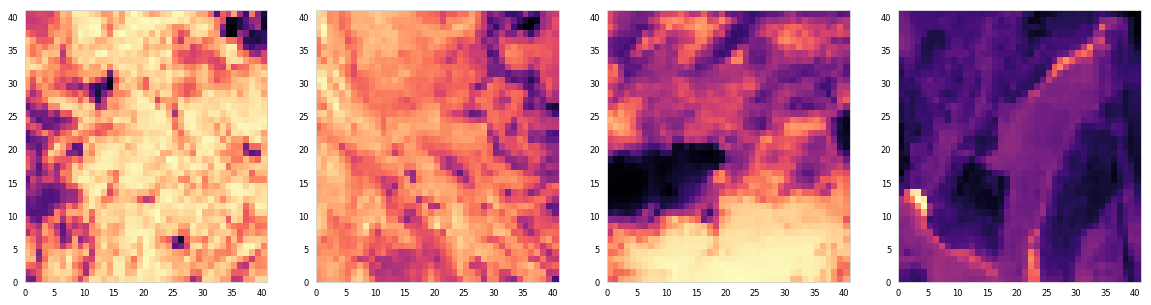

<Figure size 432x288 with 0 Axes>

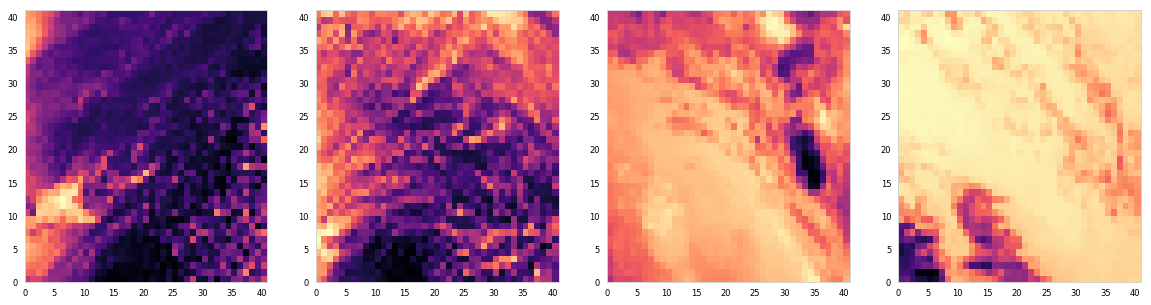

<Figure size 432x288 with 0 Axes>

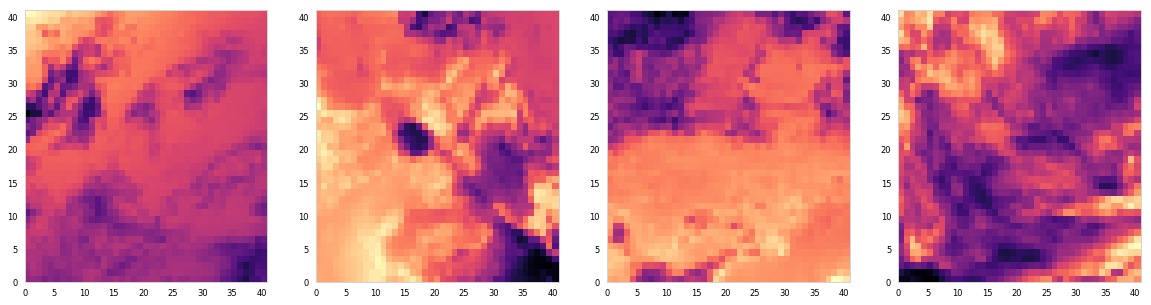

<Figure size 432x288 with 0 Axes>

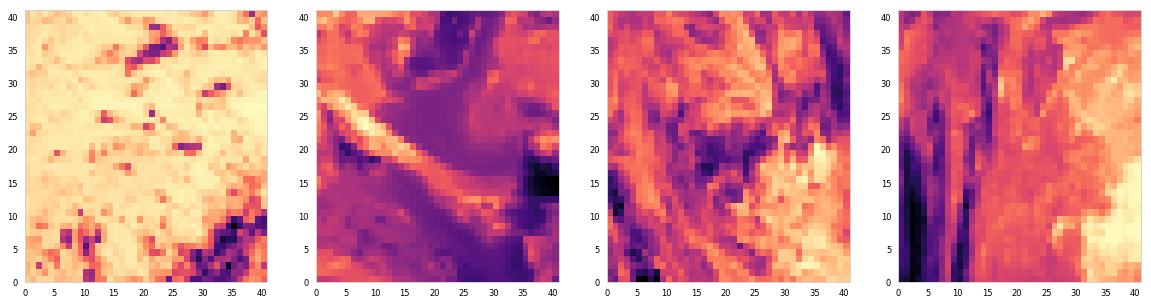

In [34]:
plot_classes(x, y, 0, 0)
plot_classes(x, y, 1, 0)
plot_classes(x, y, 2, 0)
plot_classes(x, y, 3, 0)

In [36]:
from cloud_colocations.cloud_net import CloudNetDetection

ImportError: libmkl_intel_lp64.so: cannot open shared object file: No such file or directory